In [3]:
import scipy as SP
import pylab as PL
%matplotlib inline
import glob
import h5py

In [47]:
files = {f:h5py.File(f,'r') for f in glob.glob("GTEX-ZZPU*.hdf5")} # Three example patch features of different resolutions
data = {f.split("_")[-1].split(".")[0]:files[f][f.split("_")[0]] for f in files}
sizes = ["256","1024","2048"]

## Raw feature values from a random image for each of the three resolutions

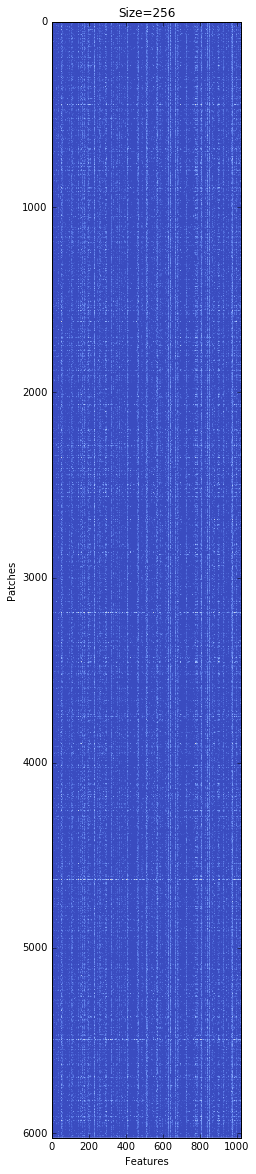

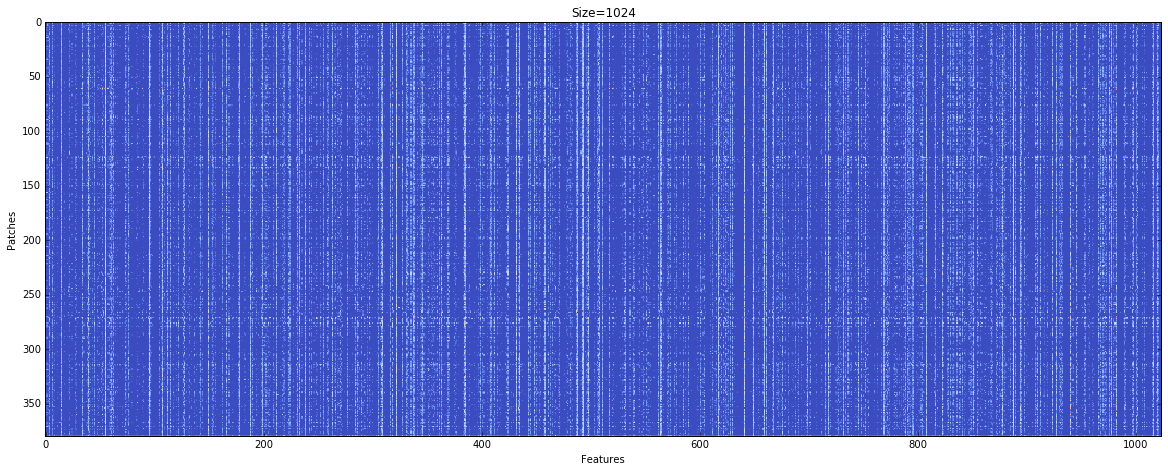

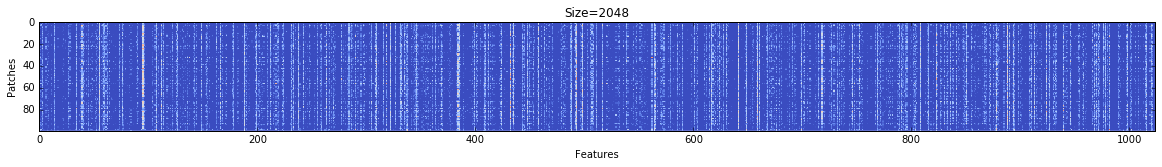

In [48]:
for size in sizes:
    PL.figure(None,[20,20])
    PL.imshow(data[size], interpolation="none", cmap=PL.get_cmap("coolwarm"))
    PL.title("Size=%s"%size)
    PL.xlabel("Features"); PL.ylabel("Patches")


Globally, it looks like features don't change much across patches (columns).

## ... and same zoomed in

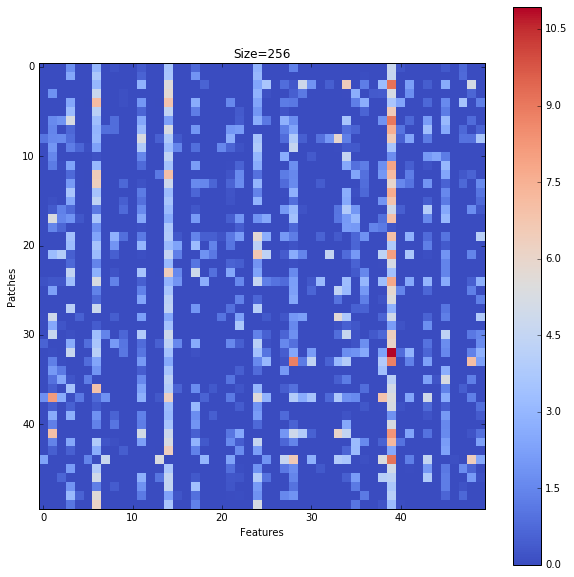

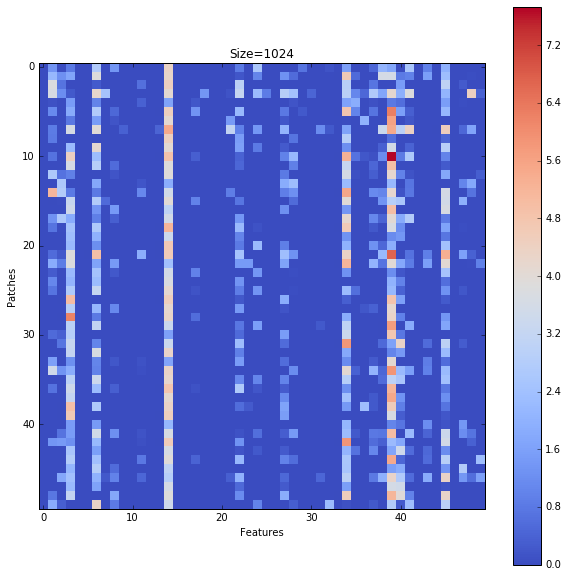

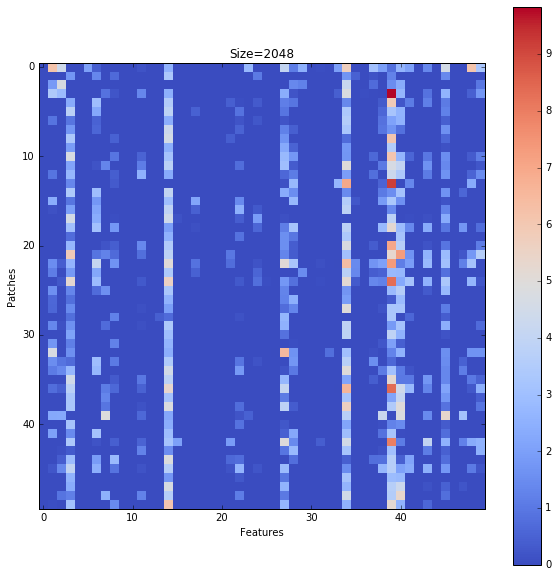

In [53]:
for size in sizes:
    PL.figure(None,[10,10])
    PL.imshow(data[size][0:50,0:50], interpolation="none", cmap=PL.get_cmap("coolwarm"))    
    PL.title("Size=%s"%size)
    PL.xlabel("Features"); PL.ylabel("Patches")
    PL.colorbar()

More variation between patches is visible when looking in detail. We can make this more explicit by looking at the distribution of variances across features below.

## Distributions of total feature activation, and variance in activation

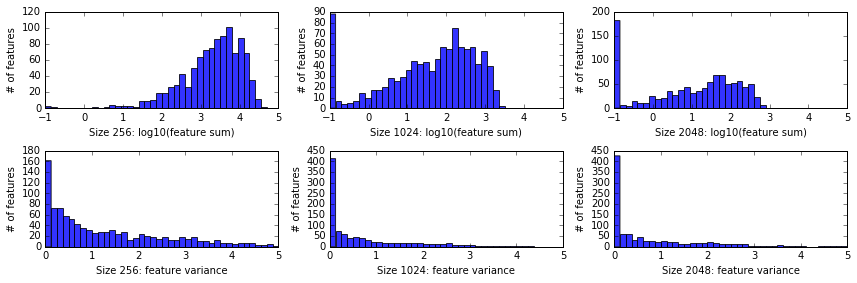

In [50]:
PL.figure(None,[12,4])
for s,size in enumerate(sizes):
    PL.subplot(2,3,s+1)
    PL.hist(SP.log10(SP.sum(data[size], axis=0)+0.1), bins=40, alpha=0.8, range=(-1,5))
    PL.xlabel("Size %s: log10(feature sum)"%size)
    PL.ylabel("# of features")
for s,size in enumerate(sizes):
    PL.subplot(2,3,s+4)
    PL.hist(SP.var(data[size], axis=0), bins=40, alpha=0.8, range=(0,5))
    PL.xlabel("Size %s: feature variance"%size)
    PL.ylabel("# of features")
PL.tight_layout()

Many features have low variance. About 17% of features are inactive (total = 0) for the largest patches, and 40% have low variance for large and medium patches.

## Correlation of totals and variances across sizes

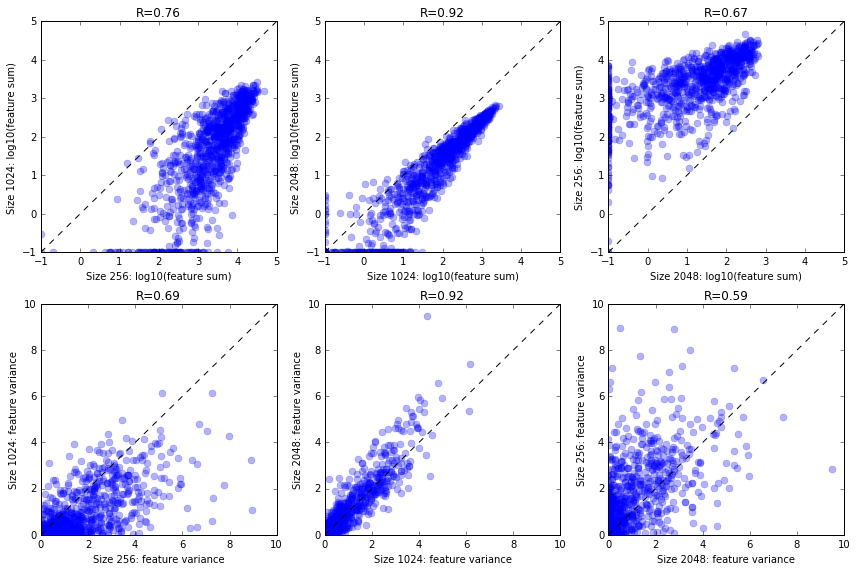

In [59]:
PL.figure(None,[12,8])
for s in range(3):
    PL.subplot(2,3,s+1)
    x,y = SP.log10(SP.sum(data[sizes[s]], axis=0)+0.1), SP.log10(SP.sum(data[sizes[(s+1)%3]], axis=0)+0.1)
    PL.plot(x,y, ".", alpha=0.3, markersize=14)
    PL.xlabel("Size %s: log10(feature sum)"%(sizes[s]))
    PL.ylabel("Size %s: log10(feature sum)"%(sizes[(s+1)%3]))
    PL.title("R=%.2f"%SP.corrcoef(x,y)[0,1])
    PL.plot([-1,5],[-1,5], 'k--')
for s in range(3):
    PL.subplot(2,3,s+4)
    x,y = SP.var(data[sizes[s]], axis=0), SP.var(data[sizes[(s+1)%3]], axis=0)
    PL.plot(x,y, ".", alpha=0.3, markersize=14)
    PL.xlabel("Size %s: feature variance"%(sizes[s]))
    PL.ylabel("Size %s: feature variance"%(sizes[(s+1)%3]))
    PL.title("R=%.2f"%SP.corrcoef(x,y)[0,1])
    PL.plot([0,10],[0,10], 'k--')
PL.tight_layout()

Sizes 1024 and 2048 are similar both for total activation and for variance (R>0.9), 256 stands out more (R<0.77).

## Distributions of randomly picked features

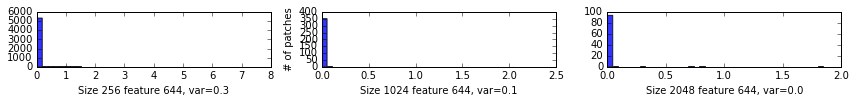

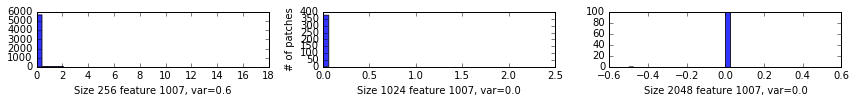

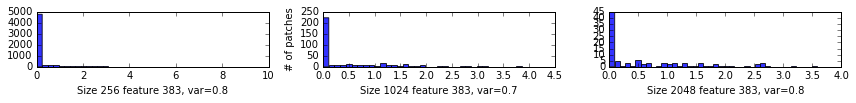

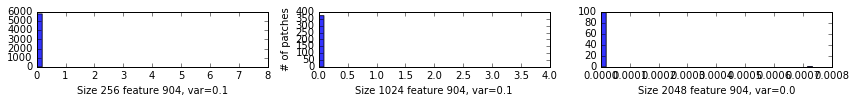

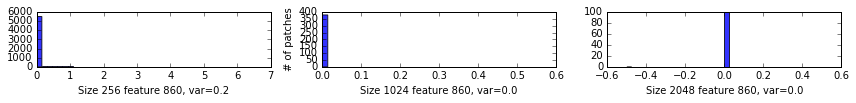

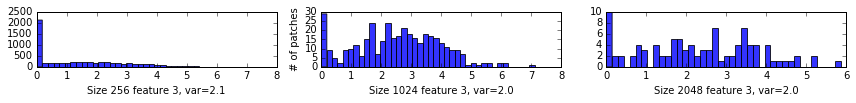

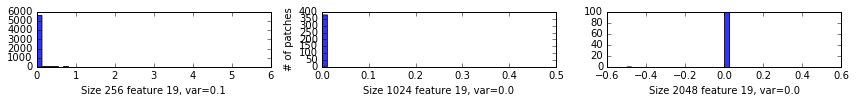

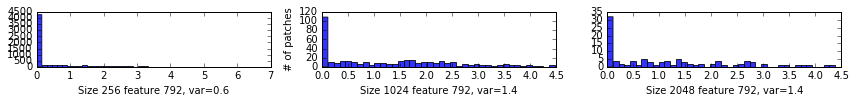

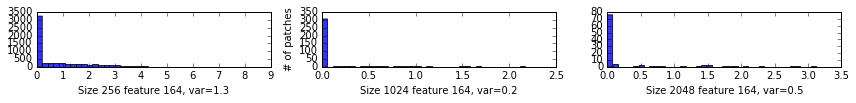

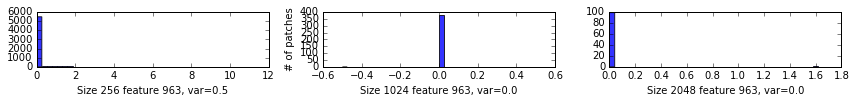

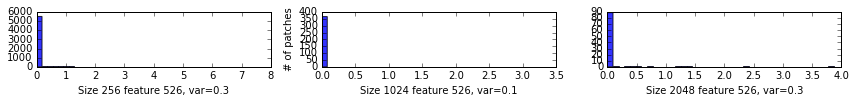

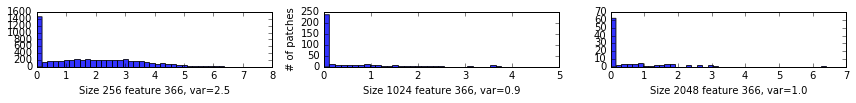

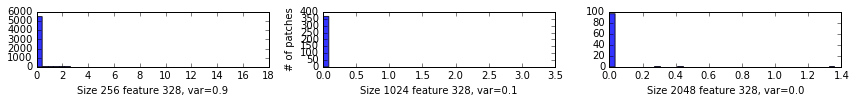

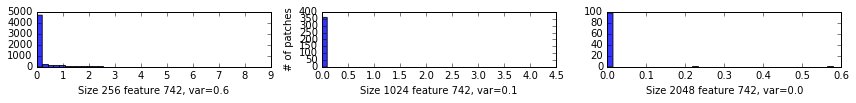

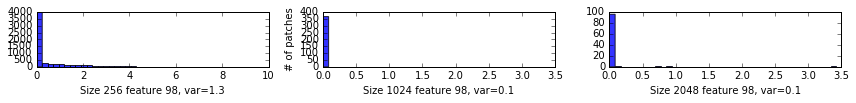

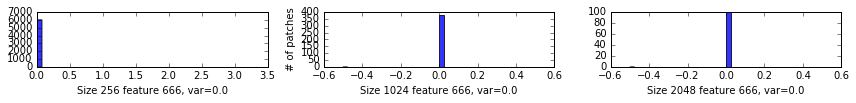

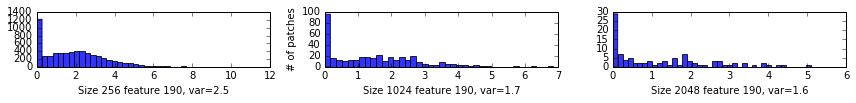

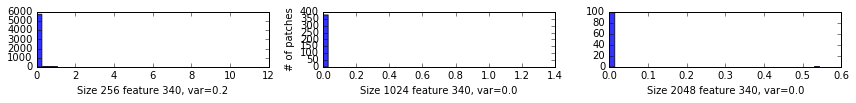

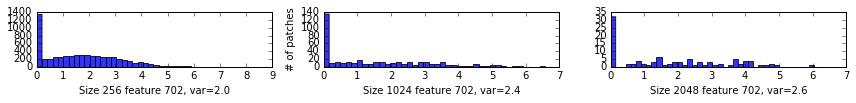

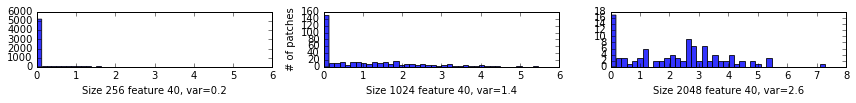

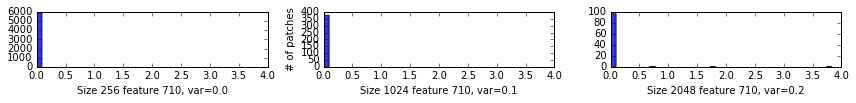

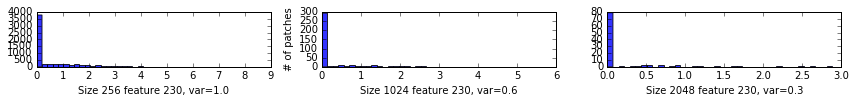

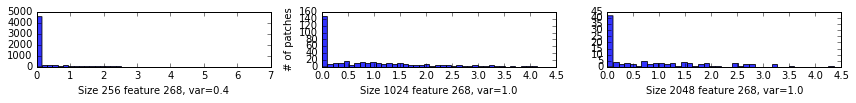

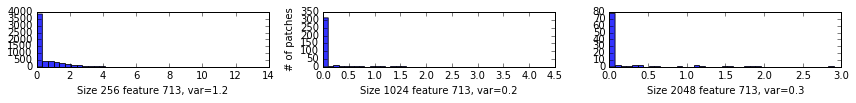

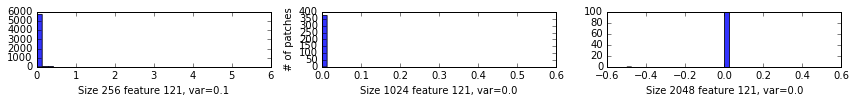

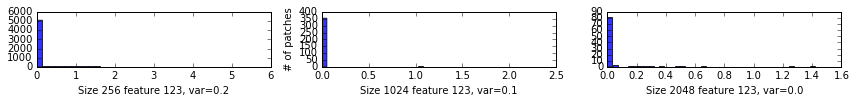

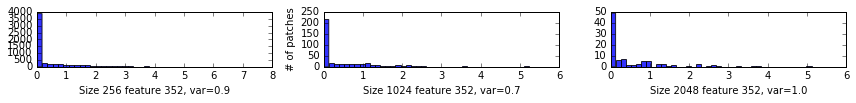

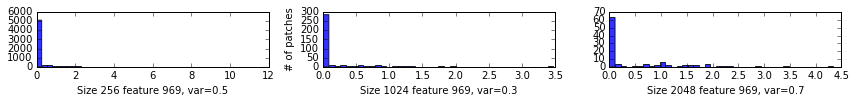

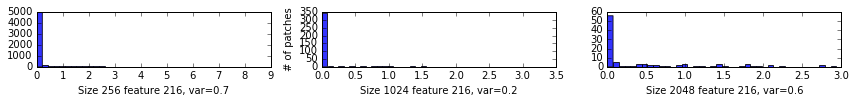

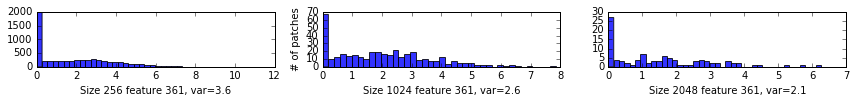

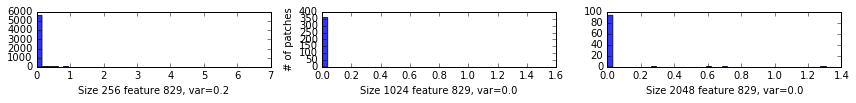

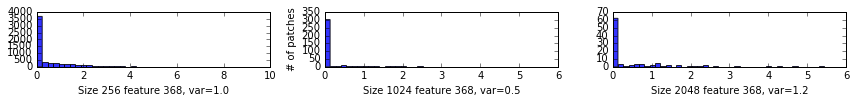

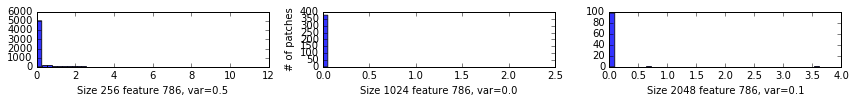

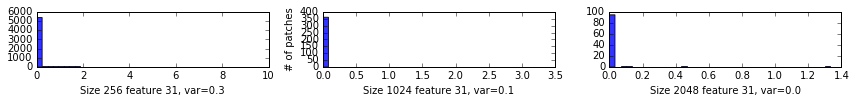

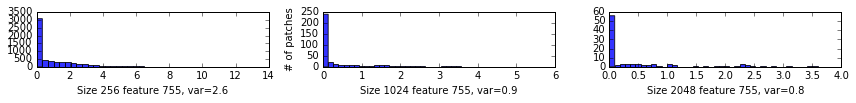

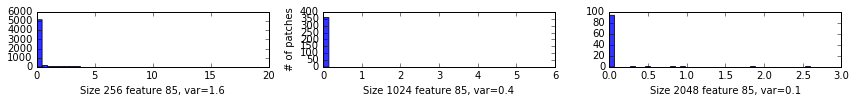

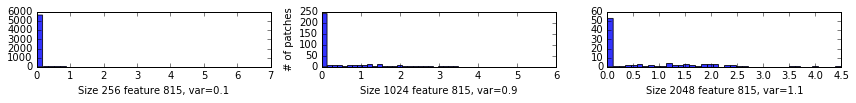

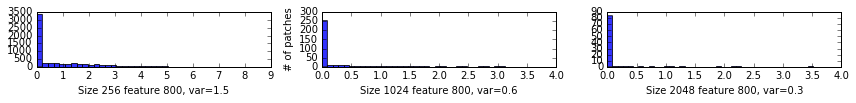

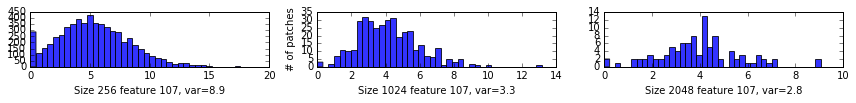

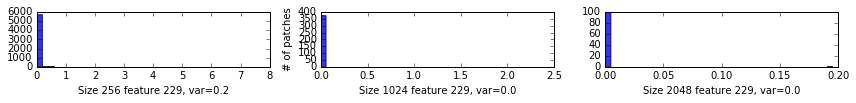

In [51]:
K = 1024
N = 40

for i in range(N):
    PL.figure(None,[12,1.5])
    k = SP.random.choice(K,1)[0]
    for s,size in enumerate(sizes):
        PL.subplot(1,3,s+1)
        PL.hist(data[size][:,k], bins=40, alpha=0.8)
        PL.xlabel("Size %s feature %d, var=%.1f"%(size, k, data[size][:,k].var()))
        if s == 1: PL.ylabel("# of patches")
        PL.tight_layout()    